<a href="https://colab.research.google.com/github/mayarachew/NLP/blob/main/Exerc%C3%ADcio_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install keras
#!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
path_train = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013train-A.txt'
path_test = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013test-A.txt'
path_valid = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013dev-A.txt'

In [4]:
df_train = pd.read_csv(path_train,names=['id','polarity','text'],sep='\t')
df_valid = pd.read_csv(path_valid,names=['id','polarity','text'],sep='\t')
df_test = pd.read_csv(path_test,names=['id','polarity','text'],sep='\t')

In [5]:
df_test

,id,polarity,text
0,264238274963451904,positive,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,positive,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,negative,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,neutral,"Excuse the connectivity of this live stream, f..."
...,...,...,...
3542,264233437060288512,negative,Khaleda Zia's present India visit may have a b...
3543,263779058284904448,neutral,"FYI, golf fans: @jameslepp will join Moj on We..."
3544,250744453831213056,negative,@__Aniko you think mr.Calle let practice with ...
3545,258679974591090688,positive,Don't hide under your desk! It's just a salsa ...


In [6]:
print(f'Train size {df_train.shape}')
print(f'Valid size {df_valid.shape}')
print(f'Test size {df_test.shape}')

Train size (9684, 3)
Valid size (1654, 3)
Test size (3547, 3)


In [7]:
df_train = df_train.drop(labels=['id'],axis=1)
df_valid = df_valid.drop(labels=['id'],axis=1)
df_test = df_test.drop(labels=['id'],axis=1)

In [8]:
vectorizer = TfidfVectorizer(norm=None,lowercase=True,stop_words="english",max_df=0.95,min_df=2)

vectorizer.fit(df_train['text'])

tfidf_train = vectorizer.transform(df_train['text']).toarray()
tfidf_valid = vectorizer.transform(df_valid['text']).toarray()
tfidf_test = vectorizer.transform(df_test['text']).toarray()

In [9]:
df_train['polarity'] = pd.Categorical(df_train['polarity'])
y_train_int = df_train['polarity'].cat.codes

df_valid['polarity'] = pd.Categorical(df_valid['polarity'])
y_valid_int = df_valid['polarity'].cat.codes

df_test['polarity'] = pd.Categorical(df_test['polarity'])
y_test_int = df_test['polarity'].cat.codes

In [10]:
y_train = to_categorical(y_train_int)
y_valid = to_categorical(y_valid_int)
y_test = to_categorical(y_test_int)

In [11]:
X_train = tfidf_train
X_valid = tfidf_valid
X_test = tfidf_test

In [12]:
N = tfidf_train.shape[0]
vocab_size = tfidf_train.shape[1]
print(f'Quantidade de instancias de treinamento {N} e tamanho do vocabulario {vocab_size}')

Quantidade de instancias de treinamento 9684 e tamanho do vocabulario 7654


Arquitetura da Rede Multilayer Perceptron Profunda

Hyperparâmetros da rede

In [13]:
number_of_neurons_layer1 = 20
number_of_neurons_layer2 = 10
number_of_neurons_output = 3
lr = 0.01

In [14]:
model = Sequential()
# Input Layer
model.add(Dense(number_of_neurons_layer1,input_dim=vocab_size,activation='sigmoid'))
model.add(Dense(number_of_neurons_layer2,activation='sigmoid'))
model.add(Dense(number_of_neurons_output,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                153100    
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 153,343
Trainable params: 153,343
Non-trainable params: 0
_________________________________________________________________


In [15]:
sgd = SGD(learning_rate=lr)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid), epochs=50)

Epoch 1/50
303/303 [==============================] - 3s 7ms/step - loss: 1.0078 - accuracy: 0.4736 - val_loss: 1.0634 - val_accuracy: 0.4468
Epoch 2/50
303/303 [==============================] - 2s 7ms/step - loss: 1.0051 - accuracy: 0.4736 - val_loss: 1.0618 - val_accuracy: 0.4468
Epoch 3/50
303/303 [==============================] - 2s 8ms/step - loss: 1.0031 - accuracy: 0.4736 - val_loss: 1.0597 - val_accuracy: 0.4468
Epoch 4/50
303/303 [==============================] - 2s 7ms/step - loss: 1.0013 - accuracy: 0.4736 - val_loss: 1.0585 - val_accuracy: 0.4468
Epoch 5/50
303/303 [==============================] - 2s 7ms/step - loss: 0.9991 - accuracy: 0.4737 - val_loss: 1.0581 - val_accuracy: 0.4468
Epoch 6/50
303/303 [==============================] - 2s 7ms/step - loss: 0.9967 - accuracy: 0.4736 - val_loss: 1.0527 - val_accuracy: 0.4468
Epoch 7/50
303/303 [==============================] - 2s 7ms/step - loss: 0.9944 - accuracy: 0.4738 - val_loss: 1.0528 - val_accuracy: 0.4468
Epoch 

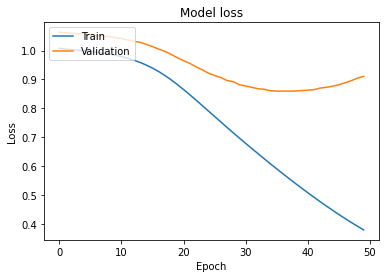

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

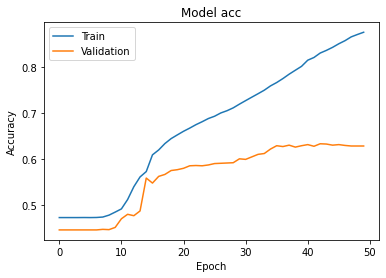

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Avaliação com os Dados de Teste

In [19]:
y = model.evaluate(X_test,y_test)

111/111 [==============================] - 0s 2ms/step - loss: 0.8884 - accuracy: 0.6462


In [20]:
y_prob = model.predict(X_test)
y_prob

array([[0.10799696, 0.15726894, 0.7347341 ],
       [0.02594371, 0.010962  , 0.9630943 ],
       [0.04736666, 0.89284337, 0.05979   ],
       ...,
       [0.17648837, 0.5587441 , 0.2647676 ],
       [0.13969491, 0.05150709, 0.80879796],
       [0.1660558 , 0.52246064, 0.3114836 ]], dtype=float32)

In [21]:
y_pred = np.argmax(y_prob,axis=1)
y_pred

array([2, 2, 1, ..., 1, 2, 1])

In [22]:
y_test_int

0       2
1       2
2       1
3       0
4       1
       ..
3542    0
3543    1
3544    0
3545    2
3546    1
Length: 3547, dtype: int8

In [23]:
y_real = np.argmax(y_test,axis=1)
y_real

array([2, 2, 1, ..., 0, 2, 1])

In [24]:
y_pred

array([2, 2, 1, ..., 1, 2, 1])

In [25]:
np.unique(y_pred)

array([0, 1, 2])

## Confusion matrix

### Implementação Scikit learn

In [26]:
confusion_matrix(y_real, y_pred)

array([[  96,  343,  120],
       [  20, 1242,  251],
       [  25,  496,  954]])

### Implementação from scratch

In [27]:
#           Predicted
#         | 0 | 1 | 2
#       0 |
#  Real 1 |
#       2 |

res_0_0 = 0
res_0_1 = 0
res_0_2 = 0

res_1_0 = 0
res_1_1 = 0
res_1_2 = 0

res_2_0 = 0
res_2_1 = 0
res_2_2 = 0

for test, pred in zip(y_real, y_pred):
  if test == 0 and pred == 0:
    res_0_0 += 1
  elif test == 0 and pred == 1:
    res_0_1 += 1
  elif test == 0 and pred == 2:
    res_0_2 += 1
  elif test == 1 and pred == 0:
    res_1_0 += 1
  elif test == 1 and pred == 1:
    res_1_1 += 1
  elif test == 1 and pred == 2:
    res_1_2 += 1
  elif test == 2 and pred == 0:
    res_2_0 += 1
  elif test == 2 and pred == 1:
    res_2_1 += 1
  elif test == 2 and pred == 2:
    res_2_2 += 1

In [28]:
confusion_matrix = [[res_0_0, res_0_1, res_0_2], [res_1_0, res_1_1, res_1_2], [res_2_0, res_2_1, res_2_2]]
np.array(confusion_matrix)

array([[  96,  343,  120],
       [  20, 1242,  251],
       [  25,  496,  954]])

## Precision, Recall and F1-score

In [29]:
print(classification_report(y_real, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.17      0.27       559
           1       0.60      0.82      0.69      1513
           2       0.72      0.65      0.68      1475

    accuracy                           0.65      3547
   macro avg       0.67      0.55      0.55      3547
weighted avg       0.66      0.65      0.62      3547



### Metrics for class 0

In [34]:
precision_0 = res_0_0 / (res_0_0 + res_1_0 + res_2_0)
recall_0 = res_0_0 / (res_0_1 + res_0_2 + res_0_0)

f1_score_0 = 2 * (precision_0 * recall_0 / (precision_0 + recall_0))

print(f'Precision: {precision_0}, recall: {recall_0}, f1_score: {f1_score_0}')

Precision: 0.6808510638297872, recall: 0.17173524150268335, f1_score: 0.27428571428571424


### Metrics for class 1

In [33]:
precision_1 = res_1_1 / (res_1_1 + res_0_1 + res_2_1)
recall_1 = res_1_1 / (res_1_1 + res_1_0 + res_1_2)

f1_score_1 = 2 * (precision_1 * recall_1 / (precision_1 + recall_1))

print(f'Precision: {precision_1}, recall: {recall_1}, f1_score: {f1_score_1}')

Precision: 0.596828447861605, recall: 0.82088565763384, f1_score: 0.6911519198664442


### Metrics for class 2

In [35]:
precision_2 = res_2_2 / (res_1_2 + res_2_2 + res_0_2)
recall_2 = res_2_2 / (res_2_2 + res_2_0 + res_2_1)

f1_score_2 = 2 * (precision_2 * recall_2 / (precision_2 + recall_2))

print(f'Precision: {precision_2}, recall: {recall_2}, f1_score: {f1_score_2}')

Precision: 0.72, recall: 0.6467796610169492, f1_score: 0.6814285714285714


### Weighted average

In [52]:
unique, counts = np.unique(y_real, return_counts=True)
counts

array([ 559, 1513, 1475])

In [54]:
precision = ((precision_0 * counts[0]) + (precision_1 * counts[1]) + (precision_2 * counts[2])) / (len(y_real))
recall = ((recall_0 * counts[0]) + (recall_1 * counts[1]) + (recall_2 * counts[2])) / (len(y_real))
f1_score = ((f1_score_0 * counts[0]) + (f1_score_1 * counts[1]) + (f1_score_2 * counts[2])) / (len(y_real))

print(f'Precision: {precision}, recall: {recall}, f1_score: {f1_score}')

Precision: 0.6612904387638735, recall: 0.6461798703129406, f1_score: 0.6214112522979383
